<a href="https://colab.research.google.com/github/oughtinc/ergo/blob/master/notebooks/community-distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup



In [ ]:
%%capture
%pip install poetry
%pip install git+https://github.com/oughtinc/ergo.git@1374915b2d8b77f50aa7f4124a43bcd44727e885
%pip install xlrd

In [ ]:
%load_ext google.colab.data_table

In [1]:
%%capture
import ergo
import numpy as np
import pandas as pd

In [15]:
metaculus = ergo.Metaculus(
    username="oughtpublic", 
    password="123456"
)

## Which questions on Metaculus range from 0 to 1?

In [17]:
questions = metaculus.get_questions(pages=999, question_status="open")

In [18]:
zero_to_one = [q for q in questions if
                   q is not None
                   and isinstance(q, ergo.metaculus.ContinuousQuestion)
                   and not isinstance(q, ergo.metaculus.LinearDateQuestion)
                   and q.question_range["min"] == 0
                   and q.question_range["max"] == 1]

In [19]:
zero_to_one_df = zero_to_one[0].to_dataframe(zero_to_one)
zero_to_one_df["url"] = zero_to_one_df["id"].apply(lambda id: f"https://www.metaculus.com/questions/{id}")
zero_to_one_df

,id,title,resolve_time,url
0,3992,What fraction of United States adults will be ...,2021-10-01T04:00:00Z,https://www.metaculus.com/questions/3992


## What proportion of questions on Metaculus are continuous rather than binary?

In [20]:
continuous = [q for q in questions if isinstance(q, ergo.metaculus.ContinuousQuestion)]
binary = [q for q in questions if isinstance(q, ergo.metaculus.BinaryQuestion)]

In [22]:
print(f"There are {len(continuous)} open continuous questions and {len(binary)} open binary questions. {len(continuous)/(len(continuous) + len(binary)):.0%} of open questions are continuous.")

There are 287 open continuous questions and 319 open binary questions. 47% of open questions are continuous.


# Goal

- What version of the distribution builder would be most useful to me?
- 

Apply these uBlock rules to avoid getting info from the community distribution:

! 5/17/2020 https://www.metaculus.com
www.metaculus.com##.metac-graph.ng-isolate-scope
www.metaculus.com##.centered.continuous-prediction-control

# Question

Looking through Metaculus for something non-COVID related (I'm tired of COVID questions), where I would think something like the dist builder would be most useful.
- obviously I want to find one that's a distribution question rather than a binary question.

Some of the questions I just find boring. I'll write out my reasons here for (not) predicting on the ones that I don't just find boring:
- [the search](https://www.metaculus.com/questions/?order_by=-activity&status=open)
- https://www.metaculus.com/questions/4418/what-is-the-greatest-number-of-users-of-any-newly-discovered-drug-at-any-year-between-2021-and-2070/: seems quite interesting and maybe promising for dist builder, but doesn't have any community predictions yet
- https://www.metaculus.com/questions/3764/when-will-the-dow-jones-industrial-average-set-a-new-all-time-record-high-close-after-the-coronavirus-crash-of-february-2020/: would be good, but date questions are too annoying to deal with
- https://www.metaculus.com/questions/3972/what-will-the-us-q2-2020-gdp-growth-rate-be-according-to-the-us-bureau-of-economic-analysis-advance-estimate/: seems decent. Will want to start by looking at historical data or news analyses, but then I think makes sense to do dist-buidler-style adjustments from there

## [US Q2 2020 GDP growth rate](https://www.metaculus.com/questions/3972/what-will-the-us-q2-2020-gdp-growth-rate-be-according-to-the-us-bureau-of-economic-analysis-advance-estimate/)

### Reference classes:
- worst historical growth rates
- projections for US Q2 2020 rate
- other COVID-era growth rates

### Worst historical growth ratesh:
- worst historical growth rates -- data was [linked in the question] (https://tradingeconomics.com/united-states/gdp-growth). Key points:
    - Q1 2020 was about -5%
    - Since roughly 1950, the lowest 10 are roughly: [-10, -8, -9, -7, -6, -5, -5, -5, -5, -5]
    
Based on this, my first prediction is:

In [ ]:
q2_growth_question = metaculus.get_question(3972)

In [ ]:
def rough_based_on_history():
    return ergo.normal_from_interval(-10, 4)

rough_based_on_history_samples = ergo.run(rough_based_on_history)

q2_growth_question.show_prediction(rough_based_on_history_samples)

### What would I have done with ability to specify more than just 5th and 95th percentiles?
I think I would have liked to use more percentiles.

Let's see, I think I'd say:
- 1st percentile: -20%
- 5th: -10%
- 10th: -7%
- 50th: -5%
- 80th: 0%
- 95th: 4%

## Continuous questions ranging from 0 to 1

This is what the dist builder can currently handle

In [23]:
pandemic = ergo.Metaculus(
    username="oughtpublic", 
    password="123456",
    api_domain="pandemic"
)

The available questions:
- https://pandemic.metaculus.com/questions/4374/how-will-covid19-impact-implicit-asian-american-bias-in-6-months-oct-2020/: seems somewhat interesting
- https://pandemic.metaculus.com/questions/4154/what-portion-of-in-hospital-patients-with-covid-19-in-el-paso-county-will-require-invasive-ventilation/: El Paso, already predicted
- https://pandemic.metaculus.com/questions/4155/what-portion-of-in-hospital-cases-in-el-paso-county-will-require-admission-to-the-icu/: El Paso, already predicted
- https://pandemic.metaculus.com/questions/4108/what-will-be-the-airbnb-occupancy-rate-in-the-us-during-the-first-full-week-of-august/: seems moderately interesting
- https://pandemic.metaculus.com/questions/4109/what-will-be-the-airbnb-occupancy-rate-in-the-uk-during-the-first-full-week-of-august/: seems moderately interesting
- https://pandemic.metaculus.com/questions/4022/what-will-be-the-fatality-ratio-in-the-us-of-covid-19-patients-who-need-and-receive-invasive-ventilation-in-2020/: seems somewhat interesting
- https://pandemic.metaculus.com/questions/3714/what-proportion-of-novel-coronavirus-infections-outside-china-by-march-27-will-be-due-to-exposure-in-china/: I think it's going to turn out the answer is close to 0? IDK, haven't looked into this much. Not very interested

### [What will be the Airbnb occupancy rate in the US during the first full week of August?](https://pandemic.metaculus.com/questions/4108/what-will-be-the-airbnb-occupancy-rate-in-the-us-during-the-first-full-week-of-august/)

#### Reference classes
- historical rates, recently
- historical rates during periods of low occupancy -- maybe during off-seasons?

#### Reference class data
- from question: https://www.airdna.co/covid-19-data-center
    - last year: around 60%
    - this year: around 40%

In [24]:
occupancy_question = pandemic.get_question(4108)

/Users/brachbach/ought/ergo/.venv/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 250 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


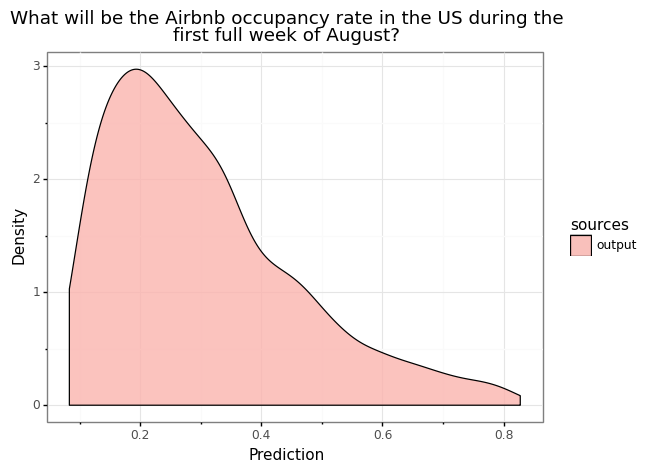

In [26]:
def rough_occupancy_based_on_history():
    return ergo.lognormal_from_interval(0.1, 0.7)

rough_occupancy_based_on_history_samples = ergo.run(rough_occupancy_based_on_history)

occupancy_question.show_prediction(rough_occupancy_based_on_history_samples)